<a href="https://colab.research.google.com/github/sboonpan/Project_SET50_DMLP/blob/main/Project_SET50_DMLP_PTT_Ret_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 11.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")

%matplotlib inline 

In [4]:
symbol = 'PTT.BK'
start  = '2011-01-01'
end    = '2020-12-31'

In [5]:
asset = yf.download(symbol, start, end) 
asset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-04,32.500000,33.299999,32.299999,33.000000,21.538401,105954000
2011-01-05,33.000000,33.200001,32.799999,33.200001,21.668940,60858000
2011-01-06,33.299999,33.400002,32.900002,33.200001,21.668940,39649000
2011-01-07,33.099998,33.099998,32.200001,32.200001,21.016262,55332000
2011-01-10,32.099998,32.200001,31.600000,31.799999,20.755188,83620000
...,...,...,...,...,...,...
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000
2020-12-28,42.250000,42.750000,41.000000,41.000000,38.989479,60698100


In [6]:
df = asset.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2441 entries, 2011-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2441 non-null   float64
 1   High       2441 non-null   float64
 2   Low        2441 non-null   float64
 3   Close      2441 non-null   float64
 4   Adj Close  2441 non-null   float64
 5   Volume     2441 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 133.5 KB


### การกรองข้อมูล

In [8]:
condition = df['Volume'] != 0
df = df[ condition]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-04,32.500000,33.299999,32.299999,33.000000,21.538401,105954000
2011-01-05,33.000000,33.200001,32.799999,33.200001,21.668940,60858000
2011-01-06,33.299999,33.400002,32.900002,33.200001,21.668940,39649000
2011-01-07,33.099998,33.099998,32.200001,32.200001,21.016262,55332000
2011-01-10,32.099998,32.200001,31.600000,31.799999,20.755188,83620000
...,...,...,...,...,...,...
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000
2020-12-28,42.250000,42.750000,41.000000,41.000000,38.989479,60698100


In [9]:
condition_1 = df['Close'].shift(1) != df['Close']
df = df[ condition_1 ]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-04,32.500000,33.299999,32.299999,33.000000,21.538401,105954000
2011-01-05,33.000000,33.200001,32.799999,33.200001,21.668940,60858000
2011-01-07,33.099998,33.099998,32.200001,32.200001,21.016262,55332000
2011-01-10,32.099998,32.200001,31.600000,31.799999,20.755188,83620000
2011-01-11,31.799999,32.000000,31.500000,31.900000,20.820452,53077000
...,...,...,...,...,...,...
2020-12-23,41.000000,41.750000,40.250000,40.250000,38.276260,122121200
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 2011-01-04 to 2020-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2168 non-null   float64
 1   High       2168 non-null   float64
 2   Low        2168 non-null   float64
 3   Close      2168 non-null   float64
 4   Adj Close  2168 non-null   float64
 5   Volume     2168 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 118.6 KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2.168000e+03
mean,36.502560,36.866398,36.126845,36.485586,29.151238,5.909233e+07
std,7.337841,7.386258,7.282928,7.330655,8.368076,4.187860e+07
min,19.900000,20.200001,19.700001,19.799999,15.553531,2.347000e+06
25%,31.900000,32.200001,31.600000,31.900000,22.651186,3.451775e+07
50%,34.400002,34.700001,34.099998,34.400002,25.271641,4.816850e+07
75%,40.000000,40.500000,39.700001,40.000000,35.464146,6.937075e+07
max,58.599998,59.500000,57.599998,58.799999,50.975815,6.437820e+08


In [12]:
df.pct_change().dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-05,0.015385,-0.003003,0.015480,0.006061,0.006061,-0.425619
2011-01-07,0.003030,-0.003012,-0.018293,-0.030120,-0.030120,-0.090802
2011-01-10,-0.030211,-0.027190,-0.018634,-0.012422,-0.012422,0.511241
2011-01-11,-0.009346,-0.006211,-0.003165,0.003145,0.003144,-0.365260
2011-01-12,0.015723,0.031250,0.025397,0.031348,0.031348,1.194152
...,...,...,...,...,...,...
2020-12-23,0.006135,0.000000,0.006250,-0.024242,-0.024242,0.256382
2020-12-24,-0.006098,-0.005988,0.012422,0.024845,0.024845,-0.628193
2020-12-25,0.012270,0.018072,0.012270,0.018182,0.018182,-0.286122


In [13]:
df.pct_change().dropna().describe()

,Open,High,Low,Close,Adj Close,Volume
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,0.000307,0.000255,0.000284,0.000316,0.000488,0.175317
std,0.019602,0.016843,0.018386,0.019861,0.019753,1.178630
min,-0.305195,-0.181818,-0.286667,-0.253333,-0.253333,-0.976917
25%,-0.009959,-0.008253,-0.008357,-0.010554,-0.010309,-0.285929
50%,0.000000,0.000000,0.000000,0.002525,0.002564,-0.032415
75%,0.009901,0.007833,0.008824,0.010513,0.010526,0.354067
max,0.154472,0.134615,0.114754,0.145631,0.145631,37.964636


In [14]:
df.shape

(2168, 6)

In [15]:
df.resample(rule = 'A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-31,32.784848,33.093074,32.432035,32.763637,21.762476,5.776588e+07
2012-12-31,33.266968,33.497285,32.993213,33.250679,22.855784,3.909963e+07
2013-12-31,32.759193,33.050673,32.441704,32.735426,23.346661,4.511322e+07
2014-12-31,32.114932,32.440724,31.781900,32.121267,23.926362,4.570844e+07
2015-12-31,30.993450,31.334498,30.621397,30.933624,23.828812,5.989229e+07
2016-12-31,30.759031,31.088106,30.438326,30.767401,24.634077,6.861766e+07
2017-12-31,39.994146,40.251707,39.705366,39.971707,33.284459,5.026020e+07
2018-12-31,51.372619,51.938333,50.830000,51.371190,44.502706,9.286069e+07
2019-12-31,46.401596,46.792553,45.986702,46.341755,41.785162,5.170416e+07


In [16]:
df.pct_change().resample(rule = 'A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-31,0.000120,-0.000036,0.000104,0.000058,0.000193,0.120226
2012-12-31,0.000325,0.000301,0.000288,0.000282,0.000436,0.148515
2013-12-31,-0.000626,-0.000611,-0.000604,-0.000556,-0.000386,0.176071
2014-12-31,0.000736,0.000685,0.000707,0.000727,0.000924,0.166105
2015-12-31,-0.001108,-0.001075,-0.001124,-0.000995,-0.000835,0.147231
2016-12-31,0.002175,0.002049,0.002151,0.002073,0.002214,0.136990
2017-12-31,0.000870,0.000820,0.000817,0.000881,0.001100,0.357635
2018-12-31,0.000313,0.000378,0.000365,0.000391,0.000561,0.142647
2019-12-31,-0.000094,-0.000144,-0.000124,-0.000152,0.000083,0.171224


In [17]:
df.pct_change().resample(rule = 'A').std()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-31,0.020808,0.017468,0.019910,0.021020,0.020918,0.613928
2012-12-31,0.012366,0.011551,0.011353,0.013221,0.013115,0.708245
2013-12-31,0.013938,0.011371,0.012710,0.015023,0.014917,1.167079
2014-12-31,0.016987,0.014992,0.016680,0.018074,0.017990,0.766968
2015-12-31,0.022297,0.018119,0.020484,0.022010,0.021887,0.689210
2016-12-31,0.020069,0.019246,0.019093,0.020722,0.020699,0.676667
2017-12-31,0.010525,0.009454,0.009244,0.011138,0.011033,2.760825
2018-12-31,0.017355,0.016613,0.016529,0.019012,0.018795,0.765334
2019-12-31,0.012995,0.011050,0.013014,0.013048,0.012771,0.916392


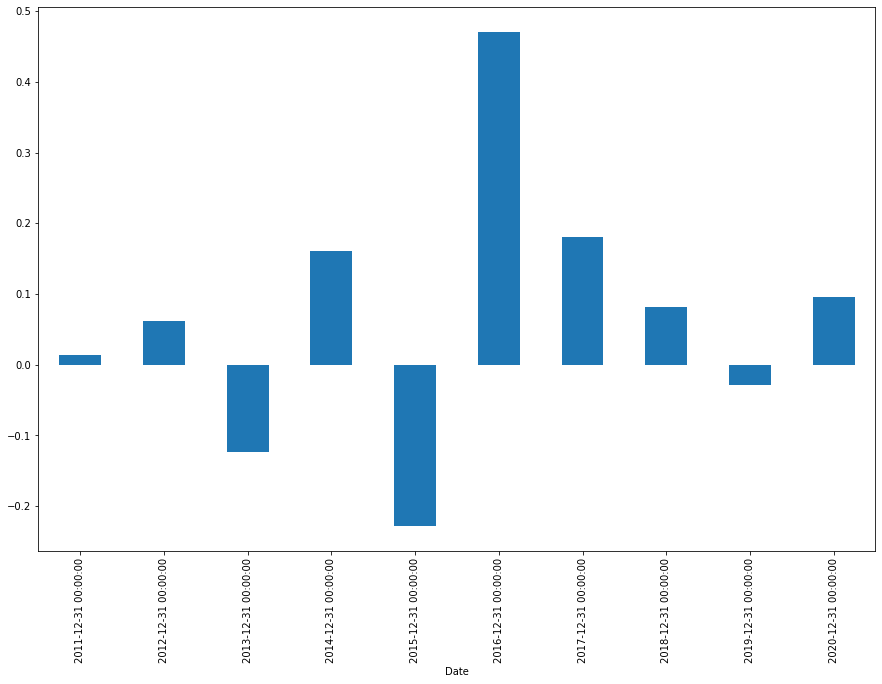

In [18]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 10.0)

df_yearly = df.pct_change()['Close'].resample(rule='A').sum()
df_yearly.plot(kind='bar')

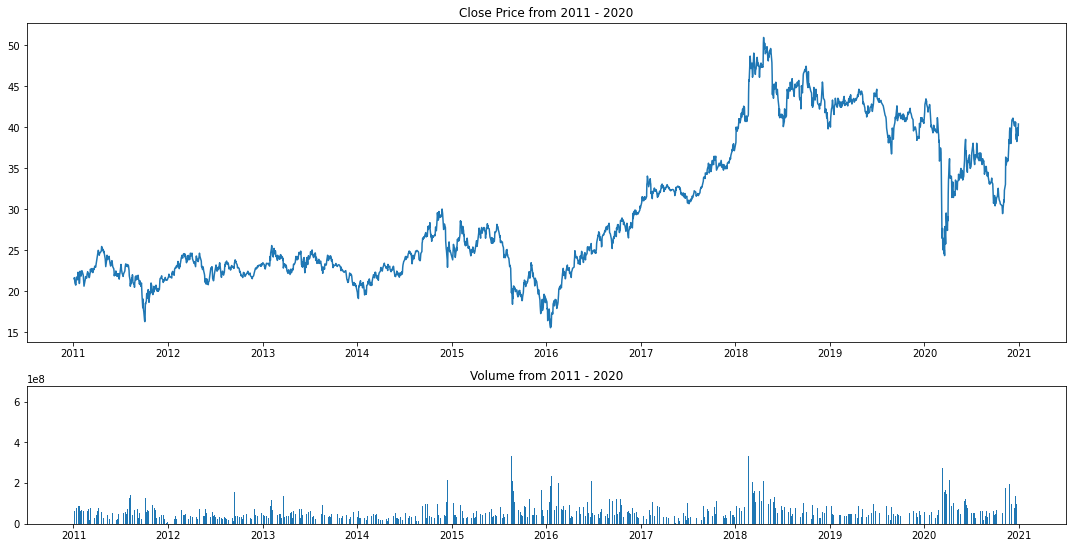

In [19]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=2, colspan=4)
top.plot(df['2011':].index,df['2011':]['Adj Close'], label='Adj Close Price')
plt.title('Close Price from 2011 - 2020')

buttom = plt.subplot2grid((4,4), (2,0), rowspan=1, colspan=4)
buttom.bar(df['2011':].index,df['2011':]['Volume'], label='Volume')
plt.title('Volume from 2011 - 2020')
plt.tight_layout() 

In [20]:
df['Returns'] = np.log(df['Close']/df['Close'].shift(1))

In [21]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2011-01-05,33.000000,33.200001,32.799999,33.200001,21.668940,60858000,0.006042
2011-01-07,33.099998,33.099998,32.200001,32.200001,21.016262,55332000,-0.030583
2011-01-10,32.099998,32.200001,31.600000,31.799999,20.755188,83620000,-0.012500
2011-01-11,31.799999,32.000000,31.500000,31.900000,20.820452,53077000,0.003140
2011-01-12,32.299999,33.000000,32.299999,32.900002,21.473135,116459000,0.030867
...,...,...,...,...,...,...,...
2020-12-23,41.000000,41.750000,40.250000,40.250000,38.276260,122121200,-0.024541
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500,0.024541
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000,0.018019


In [22]:
df['mean'] = df['Returns'].rolling(60).mean()
df

,Open,High,Low,Close,Adj Close,Volume,Returns,mean
Date,,,,,,,,
2011-01-05,33.000000,33.200001,32.799999,33.200001,21.668940,60858000,0.006042,NaN
2011-01-07,33.099998,33.099998,32.200001,32.200001,21.016262,55332000,-0.030583,NaN
2011-01-10,32.099998,32.200001,31.600000,31.799999,20.755188,83620000,-0.012500,NaN
2011-01-11,31.799999,32.000000,31.500000,31.900000,20.820452,53077000,0.003140,NaN
2011-01-12,32.299999,33.000000,32.299999,32.900002,21.473135,116459000,0.030867,NaN
...,...,...,...,...,...,...,...,...
2020-12-23,41.000000,41.750000,40.250000,40.250000,38.276260,122121200,-0.024541,0.001291
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500,0.024541,0.001925
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000,0.018019,0.002569


In [23]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Returns,mean
Date,,,,,,,,
2011-04-08,37.900002,38.099998,37.500000,37.599998,24.933664,75539000,-0.002656,0.002175
2011-04-11,37.900002,38.299999,36.700001,36.799999,24.403158,60020000,-0.021506,0.001716
2011-04-12,36.400002,37.099998,36.200001,37.099998,24.602098,60755000,0.008119,0.002361
2011-04-18,37.500000,37.799999,37.400002,37.500000,24.867348,50739000,0.010724,0.002748
2011-04-19,37.299999,37.900002,37.099998,37.700001,24.999975,58681000,0.005319,0.002784
...,...,...,...,...,...,...,...,...
2020-12-23,41.000000,41.750000,40.250000,40.250000,38.276260,122121200,-0.024541,0.001291
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500,0.024541,0.001925
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000,0.018019,0.002569


In [24]:
df['di1'] = (df['mean']+5*np.abs(df['Returns']-df['mean']))
df

,Open,High,Low,Close,Adj Close,Volume,Returns,mean,di1
Date,,,,,,,,,
2011-04-08,37.900002,38.099998,37.500000,37.599998,24.933664,75539000,-0.002656,0.002175,0.026330
2011-04-11,37.900002,38.299999,36.700001,36.799999,24.403158,60020000,-0.021506,0.001716,0.117826
2011-04-12,36.400002,37.099998,36.200001,37.099998,24.602098,60755000,0.008119,0.002361,0.031152
2011-04-18,37.500000,37.799999,37.400002,37.500000,24.867348,50739000,0.010724,0.002748,0.042628
2011-04-19,37.299999,37.900002,37.099998,37.700001,24.999975,58681000,0.005319,0.002784,0.015459
...,...,...,...,...,...,...,...,...,...
2020-12-23,41.000000,41.750000,40.250000,40.250000,38.276260,122121200,-0.024541,0.001291,0.130451
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500,0.024541,0.001925,0.115005
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000,0.018019,0.002569,0.079816


In [25]:
df['di2'] = (df['mean']-5*np.abs(df['Returns']-df['mean']))
df

,Open,High,Low,Close,Adj Close,Volume,Returns,mean,di1,di2
Date,,,,,,,,,,
2011-04-08,37.900002,38.099998,37.500000,37.599998,24.933664,75539000,-0.002656,0.002175,0.026330,-0.021980
2011-04-11,37.900002,38.299999,36.700001,36.799999,24.403158,60020000,-0.021506,0.001716,0.117826,-0.114394
2011-04-12,36.400002,37.099998,36.200001,37.099998,24.602098,60755000,0.008119,0.002361,0.031152,-0.026430
2011-04-18,37.500000,37.799999,37.400002,37.500000,24.867348,50739000,0.010724,0.002748,0.042628,-0.037133
2011-04-19,37.299999,37.900002,37.099998,37.700001,24.999975,58681000,0.005319,0.002784,0.015459,-0.009890
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,41.000000,41.750000,40.250000,40.250000,38.276260,122121200,-0.024541,0.001291,0.130451,-0.127869
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500,0.024541,0.001925,0.115005,-0.111154
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000,0.018019,0.002569,0.079816,-0.074677


In [26]:
df['R'] = None
#df['D'] = df['Returns']
df

,Open,High,Low,Close,Adj Close,Volume,Returns,mean,di1,di2,R
Date,,,,,,,,,,,
2011-04-08,37.900002,38.099998,37.500000,37.599998,24.933664,75539000,-0.002656,0.002175,0.026330,-0.021980,None
2011-04-11,37.900002,38.299999,36.700001,36.799999,24.403158,60020000,-0.021506,0.001716,0.117826,-0.114394,None
2011-04-12,36.400002,37.099998,36.200001,37.099998,24.602098,60755000,0.008119,0.002361,0.031152,-0.026430,None
2011-04-18,37.500000,37.799999,37.400002,37.500000,24.867348,50739000,0.010724,0.002748,0.042628,-0.037133,None
2011-04-19,37.299999,37.900002,37.099998,37.700001,24.999975,58681000,0.005319,0.002784,0.015459,-0.009890,None
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,41.000000,41.750000,40.250000,40.250000,38.276260,122121200,-0.024541,0.001291,0.130451,-0.127869,None
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500,0.024541,0.001925,0.115005,-0.111154,None
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000,0.018019,0.002569,0.079816,-0.074677,None


In [27]:
for i in range(len(df.index)):
     
    #if (ds.Returns[i] <= ds.di1[i] and ds.Returns[i] >= ds.di2[i]): 
    
    if df.Returns[i] >= df.di1[i] :     
        df['R'][i] = df['di1'][i]
    elif df.Returns[i] <= df.di2[i] : 
        df['R'][i] = df['di2'][i]

    else :
        df['R'][i] = df['Returns'][i]

df

,Open,High,Low,Close,Adj Close,Volume,Returns,mean,di1,di2,R
Date,,,,,,,,,,,
2011-04-08,37.900002,38.099998,37.500000,37.599998,24.933664,75539000,-0.002656,0.002175,0.026330,-0.021980,-0.0026561
2011-04-11,37.900002,38.299999,36.700001,36.799999,24.403158,60020000,-0.021506,0.001716,0.117826,-0.114394,-0.0215062
2011-04-12,36.400002,37.099998,36.200001,37.099998,24.602098,60755000,0.008119,0.002361,0.031152,-0.026430,0.0081191
2011-04-18,37.500000,37.799999,37.400002,37.500000,24.867348,50739000,0.010724,0.002748,0.042628,-0.037133,0.010724
2011-04-19,37.299999,37.900002,37.099998,37.700001,24.999975,58681000,0.005319,0.002784,0.015459,-0.009890,0.00531918
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,41.000000,41.750000,40.250000,40.250000,38.276260,122121200,-0.024541,0.001291,0.130451,-0.127869,-0.0245411
2020-12-24,40.750000,41.500000,40.750000,41.250000,39.227222,45405500,0.024541,0.001925,0.115005,-0.111154,0.0245411
2020-12-25,41.250000,42.250000,41.250000,42.000000,39.940445,32414000,0.018019,0.002569,0.079816,-0.074677,0.0180185


In [28]:
stock = df.copy()

## **Sliding Windown**

In [29]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True) : 
  n_F = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  for i in range(n_in-1, -1, -1) :
    cols.append(df.shift(i))
    names += [('F%d(t-%d)' % (j+1, i)) for j in range(n_F)]
  for i in range(1, n_out+1) :
    cols.append(df.shift(-i))
    names += [('F%d(t+%d)' % (j+1, i)) for j in range(n_F)]

  agg = pd.concat(cols, axis = 1)
  agg.columns = names
  if dropnan:
    agg.dropna(inplace = True)
  
  return agg

## **Univariat Input**

In [30]:
data_win_60 = series_to_supervised(data = stock[['R']], n_in = 60, n_out = 1, dropnan = True) 
data_win_60

,F1(t-59),F1(t-58),F1(t-57),F1(t-56),F1(t-55),F1(t-54),F1(t-53),F1(t-52),F1(t-51),F1(t-50),F1(t-49),F1(t-48),F1(t-47),F1(t-46),F1(t-45),F1(t-44),F1(t-43),F1(t-42),F1(t-41),F1(t-40),F1(t-39),F1(t-38),F1(t-37),F1(t-36),F1(t-35),F1(t-34),F1(t-33),F1(t-32),F1(t-31),F1(t-30),F1(t-29),F1(t-28),F1(t-27),F1(t-26),F1(t-25),F1(t-24),F1(t-23),F1(t-22),F1(t-21),F1(t-20),F1(t-19),F1(t-18),F1(t-17),F1(t-16),F1(t-15),F1(t-14),F1(t-13),F1(t-12),F1(t-11),F1(t-10),F1(t-9),F1(t-8),F1(t-7),F1(t-6),F1(t-5),F1(t-4),F1(t-3),F1(t-2),F1(t-1),F1(t-0),F1(t+1)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-07-18,-0.0026561,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974
2011-07-19,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931
2011-07-20,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323
2011-07-21,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.00855923
2011-07-22,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.00855923,-0.00569804
...,...,...,..

In [31]:
data = data_win_60.copy()
#data = data_win_mul5.copy()
data

,F1(t-59),F1(t-58),F1(t-57),F1(t-56),F1(t-55),F1(t-54),F1(t-53),F1(t-52),F1(t-51),F1(t-50),F1(t-49),F1(t-48),F1(t-47),F1(t-46),F1(t-45),F1(t-44),F1(t-43),F1(t-42),F1(t-41),F1(t-40),F1(t-39),F1(t-38),F1(t-37),F1(t-36),F1(t-35),F1(t-34),F1(t-33),F1(t-32),F1(t-31),F1(t-30),F1(t-29),F1(t-28),F1(t-27),F1(t-26),F1(t-25),F1(t-24),F1(t-23),F1(t-22),F1(t-21),F1(t-20),F1(t-19),F1(t-18),F1(t-17),F1(t-16),F1(t-15),F1(t-14),F1(t-13),F1(t-12),F1(t-11),F1(t-10),F1(t-9),F1(t-8),F1(t-7),F1(t-6),F1(t-5),F1(t-4),F1(t-3),F1(t-2),F1(t-1),F1(t-0),F1(t+1)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-07-18,-0.0026561,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974
2011-07-19,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931
2011-07-20,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323
2011-07-21,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.00855923
2011-07-22,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.00855923,-0.00569804
...,...,...,..

In [32]:
data['Target'] = None
#stock.drop(columns=['Returns'], inplace=True)
#stock.dropna()
data

,F1(t-59),F1(t-58),F1(t-57),F1(t-56),F1(t-55),F1(t-54),F1(t-53),F1(t-52),F1(t-51),F1(t-50),F1(t-49),F1(t-48),F1(t-47),F1(t-46),F1(t-45),F1(t-44),F1(t-43),F1(t-42),F1(t-41),F1(t-40),F1(t-39),F1(t-38),F1(t-37),F1(t-36),F1(t-35),F1(t-34),F1(t-33),F1(t-32),F1(t-31),F1(t-30),F1(t-29),F1(t-28),F1(t-27),F1(t-26),F1(t-25),F1(t-24),F1(t-23),F1(t-22),F1(t-21),F1(t-20),F1(t-19),F1(t-18),F1(t-17),F1(t-16),F1(t-15),F1(t-14),F1(t-13),F1(t-12),F1(t-11),F1(t-10),F1(t-9),F1(t-8),F1(t-7),F1(t-6),F1(t-5),F1(t-4),F1(t-3),F1(t-2),F1(t-1),F1(t-0),F1(t+1),Target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-07-18,-0.0026561,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,None
2011-07-19,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,None
2011-07-20,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,None
2011-07-21,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.00855923,None
2011-07-22,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.0085592

In [33]:
for i in range(len(data.index)):
     
    #if (ds.Returns[i] <= ds.di1[i] and ds.Returns[i] >= ds.di2[i]): 
    
    if data['F1(t+1)'][i] >= 0 :     
        data['Target'][i] = 1
    else: 
        data['Target'][i] = 0

data

,F1(t-59),F1(t-58),F1(t-57),F1(t-56),F1(t-55),F1(t-54),F1(t-53),F1(t-52),F1(t-51),F1(t-50),F1(t-49),F1(t-48),F1(t-47),F1(t-46),F1(t-45),F1(t-44),F1(t-43),F1(t-42),F1(t-41),F1(t-40),F1(t-39),F1(t-38),F1(t-37),F1(t-36),F1(t-35),F1(t-34),F1(t-33),F1(t-32),F1(t-31),F1(t-30),F1(t-29),F1(t-28),F1(t-27),F1(t-26),F1(t-25),F1(t-24),F1(t-23),F1(t-22),F1(t-21),F1(t-20),F1(t-19),F1(t-18),F1(t-17),F1(t-16),F1(t-15),F1(t-14),F1(t-13),F1(t-12),F1(t-11),F1(t-10),F1(t-9),F1(t-8),F1(t-7),F1(t-6),F1(t-5),F1(t-4),F1(t-3),F1(t-2),F1(t-1),F1(t-0),F1(t+1),Target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-07-18,-0.0026561,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,1
2011-07-19,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,1
2011-07-20,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,1
2011-07-21,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.00855923,1
2011-07-22,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.00855923,-0.0056980

In [34]:
data = data.drop('F1(t+1)', axis =1)
data

,F1(t-59),F1(t-58),F1(t-57),F1(t-56),F1(t-55),F1(t-54),F1(t-53),F1(t-52),F1(t-51),F1(t-50),F1(t-49),F1(t-48),F1(t-47),F1(t-46),F1(t-45),F1(t-44),F1(t-43),F1(t-42),F1(t-41),F1(t-40),F1(t-39),F1(t-38),F1(t-37),F1(t-36),F1(t-35),F1(t-34),F1(t-33),F1(t-32),F1(t-31),F1(t-30),F1(t-29),F1(t-28),F1(t-27),F1(t-26),F1(t-25),F1(t-24),F1(t-23),F1(t-22),F1(t-21),F1(t-20),F1(t-19),F1(t-18),F1(t-17),F1(t-16),F1(t-15),F1(t-14),F1(t-13),F1(t-12),F1(t-11),F1(t-10),F1(t-9),F1(t-8),F1(t-7),F1(t-6),F1(t-5),F1(t-4),F1(t-3),F1(t-2),F1(t-1),F1(t-0),Target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-07-18,-0.0026561,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,1
2011-07-19,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,1
2011-07-20,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,1
2011-07-21,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,1
2011-07-22,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.00855923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [35]:
X = data.drop('Target', axis =1)
y = data.Target

In [36]:
X

,F1(t-59),F1(t-58),F1(t-57),F1(t-56),F1(t-55),F1(t-54),F1(t-53),F1(t-52),F1(t-51),F1(t-50),F1(t-49),F1(t-48),F1(t-47),F1(t-46),F1(t-45),F1(t-44),F1(t-43),F1(t-42),F1(t-41),F1(t-40),F1(t-39),F1(t-38),F1(t-37),F1(t-36),F1(t-35),F1(t-34),F1(t-33),F1(t-32),F1(t-31),F1(t-30),F1(t-29),F1(t-28),F1(t-27),F1(t-26),F1(t-25),F1(t-24),F1(t-23),F1(t-22),F1(t-21),F1(t-20),F1(t-19),F1(t-18),F1(t-17),F1(t-16),F1(t-15),F1(t-14),F1(t-13),F1(t-12),F1(t-11),F1(t-10),F1(t-9),F1(t-8),F1(t-7),F1(t-6),F1(t-5),F1(t-4),F1(t-3),F1(t-2),F1(t-1),F1(t-0)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-07-18,-0.0026561,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048
2011-07-19,-0.0215062,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974
2011-07-20,0.0081191,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931
2011-07-21,0.010724,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323
2011-07-22,0.00531918,0.0183974,-0.00260762,-0.00786372,-0.00263501,-0.00794714,0.0026561,-0.0106668,0.00534763,-0.0297721,-0.00827599,-0.0395531,0.0312082,0.00834495,0.019205,-0.0219789,0.00277388,0.00276632,0.0109891,-0.0137554,-0.0252467,-0.0114287,0.0114287,0.00566576,0.011236,-0.011236,-0.0113638,-0.00860835,-0.0115944,-0.0117303,-0.0269075,0.00904981,0.00299857,-0.00902271,0.0238818,-0.0148591,-0.00600605,-0.00604234,-0.00303486,0.0150832,-0.0120484,-0.00303486,0.0150832,-0.0303975,0.0273989,0.00598806,0.0466556,-0.0114614,-0.0203792,-0.00294547,-0.0118696,-0.0120122,-0.00606053,0.00907719,0.00600605,0.0119048,0.00589974,0.0174931,0.00863323,0.00855923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [37]:
y

Date
2011-07-18    1
2011-07-19    1
2011-07-20    1
2011-07-21    1
2011-07-22    0
             ..
2020-12-22    0
2020-12-23    1
2020-12-24    1
2020-12-25    0
2020-12-28    1
Name: Target, Length: 2048, dtype: object

In [38]:
from sklearn.preprocessing import  StandardScaler
#from sklearn.preprocessing import  MinMaxScaler

In [39]:
sc = StandardScaler()

X_sc = sc.fit_transform(X)
X_sc

array([[-0.13278729, -1.08040598,  0.40943021, ...,  0.44405348,
         0.29170531,  0.58431933],
       [-1.08080142,  0.40935016,  0.54039514, ...,  0.29196348,
         0.58378422,  0.2870749 ],
       [ 0.40912287,  0.54034184,  0.26866028, ...,  0.5840844 ,
         0.28644175,  0.86093217],
       ...,
       [-1.03619726,  0.34907352,  0.34677455, ...,  0.90322052,
        -1.22083944,  1.20979914],
       [ 0.34883943,  0.34668171, -0.69224704, ..., -1.22079884,
         1.20947033,  0.88693842],
       [ 0.34644735, -0.69255204, -1.41509831, ...,  1.20986051,
         0.88650312, -1.19775381]])

In [40]:
X_sc.shape

(2048, 60)

In [41]:
y.shape

(2048,)

In [42]:
y = np.array(data['Target'])
y

array([1, 1, 1, ..., 1, 0, 1], dtype=object)

## **Train Test Split**

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_sc, y ,test_size=0.3, random_state=1 ) 

In [44]:
X_train.shape, X_test.shape

((1433, 60), (615, 60))

In [45]:
y_train.shape, y_test.shape

((1433,), (615,))

In [46]:
y_train

array([1, 0, 0, ..., 1, 0, 0], dtype=object)

In [47]:
y_test

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

# **Model**

In [48]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True, 
)

In [49]:
X_train.shape[1] 

60

In [50]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [51]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [52]:
X_train 

array([[ 0.2778877 ,  0.55065393,  0.27373245, ...,  0.2517896 ,
        -0.2629063 ,  0.50798994],
       [ 1.570325  ,  0.42070726,  0.9667889 , ..., -1.2207977 ,
        -1.7267615 ,  0.9409103 ],
       [-0.76315415,  0.2569799 , -0.7702884 , ...,  0.76233226,
         0.24759005, -0.2581462 ],
       ...,
       [ 1.8869771 , -1.5656209 , -0.63924086, ...,  1.3513883 ,
         1.3147957 ,  1.9113649 ],
       [ 1.1876875 ,  1.160464  ,  0.42912206, ...,  0.73700655,
         0.58030176,  0.2853621 ],
       [-0.40316367, -0.20210777, -2.0766006 , ...,  0.1667795 ,
         0.50743157, -1.036217  ]], dtype=float32)

In [53]:
y_train

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [54]:
X_test

array([[ 0.2099111 ,  1.0336838 ,  1.4118809 , ..., -2.0521321 ,
         1.4356021 , -1.2373536 ],
       [-0.5123989 ,  0.5142031 ,  0.3825951 , ..., -0.91654813,
         0.12547928,  0.25625363],
       [ 0.17633556,  0.3502799 ,  0.6923255 , ...,  0.4792532 ,
        -0.49033722,  0.7999204 ],
       ...,
       [ 0.40692458,  0.13570714, -0.13338079, ..., -0.24185333,
         1.1649392 ,  0.2258096 ],
       [-1.0644393 ,  0.76415724,  0.15243606, ..., -0.30928844,
        -0.61888456,  0.14901045],
       [ 0.15626113,  0.61808586,  0.30686468, ..., -1.2993034 ,
        -0.29781085,  0.43244356]], dtype=float32)

In [55]:
y_test

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0.

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Activation 
#from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dropout(0.2)) 
 
model.add(Dense(16, activation='relu', ))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid')) 

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1952      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.output_shape

(None, 1)

In [59]:
#model.get_config()

In [60]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),

In [61]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics = ['accuracy'])

In [62]:
#model.compile(loss='binary_crossentropy',learning_rate = 0.01, optimizer='adam', metrics = ['accuracy'])

In [63]:
import time

In [64]:
start_time = time.time()
#history = model.fit(X_train, y_train, epochs=100 , batch_size=32, verbose=1, validation_split=0.2) 
history = model.fit(X_train, y_train, epochs=100 , batch_size=32, callbacks=[early_stopping], verbose=1, validation_split=0.2)
end_time = time.time()
print('Training time= ', end_time - start_time)

Epoch 1/100
36/36 [==============================] - 3s 12ms/step - loss: 0.7341 - accuracy: 0.5052 - val_loss: 0.6907 - val_accuracy: 0.5122
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6729 - accuracy: 0.5916 - val_loss: 0.6820 - val_accuracy: 0.5017
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6178 - val_loss: 0.6905 - val_accuracy: 0.5296
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6398 - accuracy: 0.6239 - val_loss: 0.6914 - val_accuracy: 0.5226
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.6475 - val_loss: 0.6845 - val_accuracy: 0.5226
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6024 - accuracy: 0.6562 - val_loss: 0.6908 - val_accuracy: 0.5679
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.5964 - accuracy: 0.6719 - val_loss: 0.7112 - val_accuracy: 0.5679
Training tim

In [65]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7222206592559814
Test accuracy: 0.4829268157482147


In [66]:
y_pred_pr = model.predict(X_test)
y_pred_pr[:4]

array([[0.5001908 ],
       [0.55823654],
       [0.4618975 ],
       [0.3821231 ]], dtype=float32)

In [67]:
y_pred = (y_pred_pr > 0.5).astype(int)  
# y_pred = np.where(y_pred_pr > .5, 1,0)

y_pred[:4]

array([[1],
       [1],
       [0],
       [0]])

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print('Score->',score[1])

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Score-> 0.4829268157482147
              precision    recall  f1-score   support

         0.0       0.46      0.47      0.46       292
         1.0       0.51      0.50      0.50       323

    accuracy                           0.48       615
   macro avg       0.48      0.48      0.48       615
weighted avg       0.48      0.48      0.48       615

[[137 155]
 [163 160]]


In [69]:
df_hist = pd.DataFrame.from_dict(history.history)
history.params
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

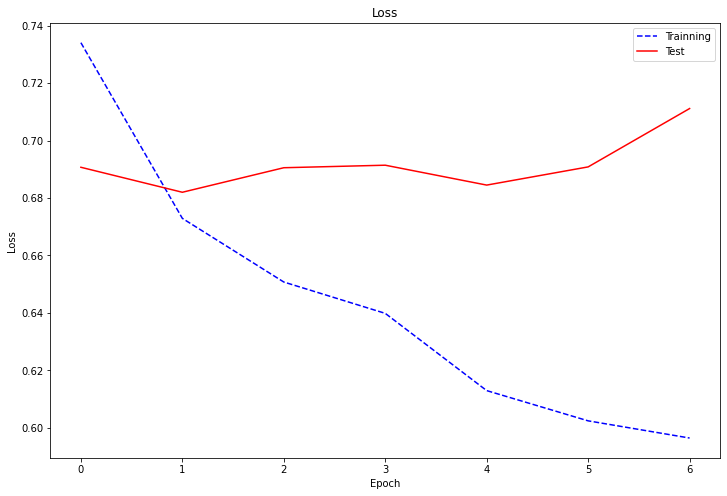

In [70]:
plt.figure(figsize=(12, 8))

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss')
plt.show()

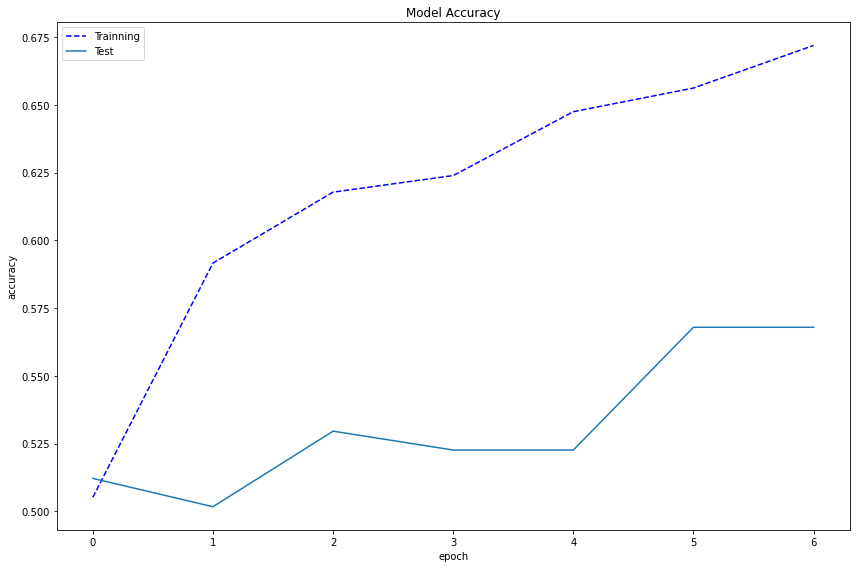

In [71]:
plt.figure(figsize=(12, 8))

df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.tight_layout() 

plt.show()

# Evaluation 

## Test Data

In [72]:
y_test

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0.

In [73]:
y_pred = y_pred.reshape(-1)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [74]:
y_pred.shape[0]

615

In [75]:
y_test.shape[0]

615

In [76]:
data_test = pd.Series(y_test).astype(np.int)
data_test

0      0
1      0
2      0
3      1
4      1
      ..
610    1
611    1
612    0
613    0
614    0
Length: 615, dtype: int64

In [77]:
data_predict = pd.Series(y_pred)
data_predict

0      1
1      1
2      0
3      0
4      0
      ..
610    1
611    0
612    1
613    1
614    1
Length: 615, dtype: int64

In [78]:
datas = list(zip(data_test, data_predict))
cols = ['Test', 'Predict']
Test_Stock = pd.DataFrame(datas, columns = cols)

In [79]:
Test_Stock

,Test,Predict
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0
...,...,...
610,1,1
611,1,0
612,0,1
613,0,1


In [80]:
Test_Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Test     615 non-null    int64
 1   Predict  615 non-null    int64
dtypes: int64(2)
memory usage: 9.7 KB


In [81]:
(Test_Stock['Test'] == Test_Stock['Predict']).value_counts()

False    318
True     297
dtype: int64

In [82]:
hit_rate_test = (Test_Stock['Test'] == Test_Stock['Predict']).value_counts()
hit_rate_test

False    318
True     297
dtype: int64

In [83]:
acc_test = hit_rate_test.values[0]/hit_rate_test.sum()
acc_test

0.5170731707317073

## **Straegy Simulation**

In [84]:
Test_Stock

,Test,Predict
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0
...,...,...
610,1,1
611,1,0
612,0,1
613,0,1


In [87]:
Test_Stock['Position'] = None
Test_Stock

,Test,Predict,Position
0,0,1,None
1,0,1,None
2,0,0,None
3,1,0,None
4,1,0,None
...,...,...,...
610,1,1,None
611,1,0,None
612,0,1,None
613,0,1,None


In [88]:
for i in range(len(Test_Stock.index)):
     
    #if (ds.Returns[i] <= ds.di1[i] and ds.Returns[i] >= ds.di2[i]): 
    
    if Test_Stock['Predict'][i] ==  0 :     
        Test_Stock['Position'][i] = -1
    else: 
        Test_Stock['Position'][i] = 1

Test_Stock

,Test,Predict,Position
0,0,1,1
1,0,1,1
2,0,0,-1
3,1,0,-1
4,1,0,-1
...,...,...,...
610,1,1,1
611,1,0,-1
612,0,1,1
613,0,1,1
